In [1]:
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper

In [3]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2, doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv, description="Query arxiv papers")
print(arxiv.name)

arxiv


In [8]:
arxiv.invoke("What is the latest invention in agentic AI?")
arxiv.invoke("Attention is all you need")

'Published: 2021-05-06\nTitle: Do You Even Need Attention? A Stack of Feed-Forward Layers Does Surprisingly Well on ImageNet\nAuthors: Luke Melas-Kyriazi\nSummary: The strong performance of vision transformers on image classification and other vision tasks is often attributed to the design of their multi-head attention layers. However, the extent to which attention is responsible for this strong performance remains unclear. In this short report, we ask: is the attention layer even necessary? Specifi'

In [5]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=2, doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
print(wiki.name)

wikipedia


In [6]:
wiki.invoke("Amitabh Bachchan")

"Page: Amitabh Bachchan\nSummary: Amitabh Bachchan (né Srivastava; born 11 October 1942) is an Indian actor who works in Hindi cinema. He is considered one of the greatest, most accomplished and commercially successful actors in the history of Indian cinema. With a cinematic career spanning over five decades, he has played in over 200 films.  Bachchan has been called as the Shahenshah of Bollywood, Sadi ke Mahanayak (translated as superstar of the century in Hindi), Bollywood's Star of the Millenn"

In [13]:
from dotenv import load_dotenv
load_dotenv()

import os
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [14]:
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

/tmp/ipykernel_347487/735679136.py:3: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults()


In [15]:
tavily.invoke("Dhurandhar total collection")

[{'title': 'Dhurandhar Box Office Collection Day 56: Delivers The Highest 8th ...',
  'url': 'https://www.koimoi.com/box-office/dhurandhar-box-office-collection-day-56-delivers-the-highest-8th-week-only-8-crores-away-from-rewriting-history/',
  'content': '#### Dhurandhar Box Office Collection Day 56\n\nAccording to estimates, Dhurandhar earned 36 lakhs on day 56. Despite the mid-week blues, Aditya Dhar’s directorial is maintaining an excellent hold. There’s also competition from Border 2, but it’s clearly successfully beating the odds.\n\nThe total box office collection in India has reached 892.02 crores net. Ranveer Singh starrer is made on a budget of 225 crores. In 8 weeks, the makers have raked in profits of 296.45%. A super-duper hit!\n\n#### Trending\n\n#### Take a look at the detailed box office breakdown in India (net collection):\n\nTotal – 892.02 crores\\\n\n#### Records the highest 8th week in Hindi cinema [...] #### Records the highest 8th week in Hindi cinema\n\nDhurandha

In [16]:
tavily.invoke("What is motlbook")

[{'title': 'Motobook 60 In-Depth Review - 2.8K 120Hz 1100 Nits HDR OLED ...',
  'url': 'https://www.youtube.com/watch?v=qSycnVWfNYE',
  'content': "This is the Motorola Motobook 60. When this laptop was announced, there was a ton of sponsored videos on this laptop and I literally didn't care about it. It is not even overpriced or anything. Still, I didn't care. Now, the thing is, I have been sick and tired of my IPS monitor and I've been looking for a monitor that can provide me with a true HDR experience. That is something with a mini LED backlight or straightup OLED. But the issue is there are no good value for money miniLEDD monitor in India and the cheapest OLED monitor costs around 55,000 Indian rupees. Now I keep browsing for large screen OLED devices like laptops, tablets and monitors every other day and that's when suddenly the Motobook 60 popped up and what caught my attention was this promo image advertising a peak [...] laptop. like I mentioned earlier. Okay. Now, Motorola a

In [27]:
### combining all tools in the list

tools = [arxiv, wiki, tavily]

In [28]:
from langchain_groq import ChatGroq

llm=ChatGroq(model="openai/gpt-oss-120b")

In [29]:
llm.invoke("what is ai")

AIMessage(content='**Artificial Intelligence (AI)** is a branch of computer science that focuses on creating systems capable of performing tasks that normally require human intelligence. These tasks include learning, reasoning, problem‑solving, perception, language understanding, and decision‑making.\n\n### Core Ideas\n\n| Concept | What It Means |\n|---------|----------------|\n| **Machine Learning (ML)** | Algorithms that improve their performance automatically by learning from data (e.g., classification, regression). |\n| **Deep Learning** | A subset of ML that uses multi‑layered neural networks to model complex patterns (e.g., image and speech recognition). |\n| **Natural Language Processing (NLP)** | Techniques that enable computers to understand, generate, and interact with human language (e.g., chatbots, translation). |\n| **Computer Vision** | Methods for interpreting visual information from images or video (e.g., object detection, facial recognition). |\n| **Reinforcement Lear

In [30]:
llm_with_tools=llm.bind_tools(tools=tools)

In [34]:
#Execute this call
llm_with_tools.invoke("What is in attention is all you need?")

AIMessage(content='**“Attention Is All You Need”** is the title of a landmark research paper published in 2017 by a team at Google Brain (Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit,\u202f…\u202fand others). The paper introduced the **Transformer** model, which has become the dominant architecture for modern natural‑language‑processing (NLP) systems (BERT, GPT‑3/4, T5, etc.) and is now spreading to vision, speech, and many other domains.\n\nBelow is a concise overview of what the paper contains, why it mattered, and how the model works.\n\n---\n\n## 1. Problem the paper addresses\n- **Sequence‑to‑sequence tasks** (e.g., machine translation) were traditionally handled with recurrent neural networks (RNNs) or convolutional neural networks (CNNs) plus an attention mechanism.\n- RNN‑based models process tokens **sequentially**, which limits parallelism and makes training slow, especially for long sequences.\n- Even with attention, the recurrent backbone still imposes a step‑

In [35]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages #reducers in langgraph

In [36]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [37]:
from IPython.display import display, Image
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

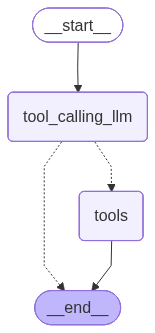

In [40]:
def tool_calling_llm(state:State):
    return {"messages": [llm_with_tools.invoke(state['messages'])]}


builder=StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))


builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    
    tools_condition,
)
builder.add_edge("tools",END)

graph=builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [41]:
messages=graph.invoke({"messages":"1706.03762"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (fc_44f0b439-a499-4248-bab2-c65b16f060b7)
 Call ID: fc_44f0b439-a499-4248-bab2-c65b16f060b7
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or convolutional neural networks in an encoder-decoder configuration. The best performing models also connect the encoder and decoder through an attention mechanism. We propose a new simple network architecture, the Transformer, base


In [42]:
messages=graph.invoke({"messages":"Who is Steve Rogers?"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Who is Steve Rogers?
================================== Ai Message ==================================

**Steve Rogers** is the civilian identity of **Captain America**, one of the most iconic superheroes in Marvel Comics.

| Aspect | Details |
|--------|---------|
| **First Appearance** | *Captain America Comics* #1 (March 1941) – created by **Joe Simon** (writer/artist) and **Jack Kirby** (artist). |
| **Origin Story** | - Born in 1918 in Brooklyn, New York.<br>- A frail, patriotic young man who tried to enlist in the U.S. Army during World II but was rejected for being physically unfit.<br>- Volunteered for the secret “**Super‑Soldier**” program, undergoing a specially designed serum and Vita‑Ray treatment that transformed him into a peak‑human specimen. |
| **Powers & Abilities** | - **Super‑human strength, speed, stamina, agility, reflexes, and durability** (the “Super‑Soldier” serum puts his body at 

In [43]:
messages=graph.invoke({"messages":"dhurandhar total collection"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

dhurandhar total collection
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (fc_23a44b2e-50f3-4a21-9a4c-3d0bbda87391)
 Call ID: fc_23a44b2e-50f3-4a21-9a4c-3d0bbda87391
  Args:
    query: Dhurandhar total collection box office
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Dhurandhar Box Office Collection | India - Bollywood Hungama", "url": "https://www.bollywoodhungama.com/movie/dhurandhar/box-office/", "content": "Q: What is the overall Box Office Collection of Dhurandhar?  \n A:Dhurandhar collected ₹1347.4 cr. at the worldwide box office. In India, it collected ₹893.05 cr. Nett (₹1054.37 cr. Gross) and in overseas, it grossed ₹293.03 cr.\n\nQ: What is the Day 1 Box Office Collection of Dhurandhar?  \n A: Dhurandhar collected ₹28.60 cr. on Day 1 at the

In [44]:
messages=graph.invoke({"messages":"Hi, My name is Om"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hi, My name is Om
================================== Ai Message ==================================

Hello Om! 👋 Nice to meet you. How can I assist you today?


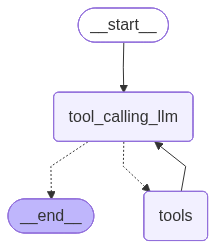

In [ ]:
###MAKING A LOOP

def tool_calling_llm(state:State):
    return {"messages": [llm_with_tools.invoke(state['messages'])]}


builder=StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))


builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    
    tools_condition,
)
builder.add_edge("tools","tool_calling_llm")

graph=builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [47]:
messages=graph.invoke({"messages":"Hi, My name is Om and please tell me the recent research paper on quantum computing?"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hi, My name is Om and please tell me the recent research paper on quantum computing?
================================== Ai Message ==================================
Tool Calls:
  arxiv (fc_49231a16-3a3d-4b14-a6b3-62b1bccb3bfb)
 Call ID: fc_49231a16-3a3d-4b14-a6b3-62b1bccb3bfb
  Args:
    query: quantum computing 2024
================================= Tool Message =================================
Name: arxiv

Published: 2022-11-04
Title: Tierkreis: A Dataflow Framework for Hybrid Quantum-Classical Computing
Authors: Seyon Sivarajah, Lukas Heidemann, Alan Lawrence, Ross Duncan
Summary: We present Tierkreis, a higher-order dataflow graph program representation and runtime designed for compositional, quantum-classical hybrid algorithms. The design of the system is motivated by the remote nature of quantum computers, the need for hybrid algorithms to involve cloud and distributed computing, and the long-
===

In [48]:
messages=graph.invoke({"messages":"What is the recent AI news and please tell me the recent research paper on quantum computing?"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the recent AI news and please tell me the recent research paper on quantum computing?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (fc_276a4135-6cde-4ce5-9be2-057417236103)
 Call ID: fc_276a4135-6cde-4ce5-9be2-057417236103
  Args:
    query: latest AI news 2024
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "2024: A year of extraordinary progress and advancement in AI", "url": "https://blog.google/innovation-and-ai/products/2024-ai-extraordinary-progress-advancement/", "content": "## Bullet points\n\n This article summarizes Google's AI advancements in 2024, highlighting their commitment to responsible development.\n Google released Gemini 2.0, a powerful AI model designed for the \"agentic era,\" and integrated it into various products.\n They